In [1]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import colors
from matplotlib.ticker import PercentFormatter
# regression analysis


import sys
import os
from pathlib import Path

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")

from players_season_builder import *


Summary - Describing the data we have

Players >24 mins:
 - histogram - minutes played across starters by season
 - 



In [2]:
player_path = r"\Users\sebas\Desktop\UChicago - Q6\Sports Analytics\sports_analytics_project\data\BDB_Player.xlsx"

df_player = pd.read_excel(player_path)

# I hate this
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2006-2007 Regular Season',
    '06-07'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2007-2008 Regular Season',
    '07-08'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2008-2009 Regular Season',
    '08-09'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2009-2010 Regular Season',
    '09-10'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2010-2011 Regular Season',
    '10-11'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2011-2012 Regular Season',
    '11-12'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2012-2013 Regular Season',
    '12-13'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2013-2014 Regular Season',
    '13-14'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2014-2015 Regular Season',
    '14-15'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2015-2016 Regular Season',
    '15-16'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2016-2017 Regular Season',
    '16-17'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2017-2018 Regular Season',
    '17-18'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2018-2019 Regular Season',
    '18-19'
)
df_player['DATASET'] = df_player['DATASET'].str.replace(
    '2019-2020 Regular Season',
    '19-20'
)

In [3]:
df_player.columns

Index(['DATASET', 'DATE', 'PLAYER FULL NAME', 'POSITION', 'OWN TEAM',
       'OPP TEAM', 'VENUE', 'MIN', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'OR',
       'DR', 'TOT', 'A', 'PF', 'ST', 'TO', 'BL', 'PTS', 'PER', 'DATE-DIFF',
       '1.0 days', '10.0 days', '11.0 days', '12.0 days', '13.0 days',
       '14+ days', '14.0 days', '2.0 days', '3.0 days', '4.0 days', '5.0 days',
       '6.0 days', '7.0 days', '8.0 days', '9.0 days', 'Season Start days'],
      dtype='object')

In [13]:
df_hist_minutes = df_player.groupby(['DATASET','PLAYER FULL NAME'])['MIN','PER'].mean().reset_index()
df_hist_sum = df_player.groupby(['DATASET'])['MIN','PER'].agg(
    [np.mean, np.std, np.var, np.median, np.min, np.max]
)

# df_hist_minutes.columns = ['_'.join(col) for col in df_hist_minutes.columns]
df_hist_sum.columns = ['_'.join(col) for col in df_hist_sum.columns]
df_hist_sum = df_hist_sum.reset_index()
df_hist_sum.head()

# df_player.groupby(['DATASET','DATE-DIFF']).agg(
#     np.count_nonzero
# )
# df_player.groupby(['DATASET',"PLAYER FULL NAME"])['1.0 days',  '2.0 days', '3.0 days', '4.0 days', '5.0 days',
#        '6.0 days', '7.0 days', '8.0 days', '9.0 days', '10.0 days', '11.0 days', '12.0 days', '13.0 days','14.0 days','14+ days'].agg(
#     [ np.count_nonzero]
# )
season_rest_df = df_player.groupby(['DATASET'])['1.0 days',  '2.0 days', '3.0 days', '4.0 days', '5.0 days',
       '6.0 days', '7.0 days', '8.0 days', '9.0 days', '10.0 days', '11.0 days', '12.0 days', '13.0 days','14.0 days','14+ days'].agg(
    [ np.count_nonzero]
)



<ipython-input-13-3358ffbe5441>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_hist_minutes = df_player.groupby(['DATASET','PLAYER FULL NAME'])['MIN','PER'].mean().reset_index()
<ipython-input-13-3358ffbe5441>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_hist_sum = df_player.groupby(['DATASET'])['MIN','PER'].agg(
<ipython-input-13-3358ffbe5441>:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  season_rest_df = df_player.groupby(['DATASET'])['1.0 days',  '2.0 days', '3.0 days', '4.0 days', '5.0 days',


General Plots - Start here

<AxesSubplot:xlabel='DATASET', ylabel='MIN'>

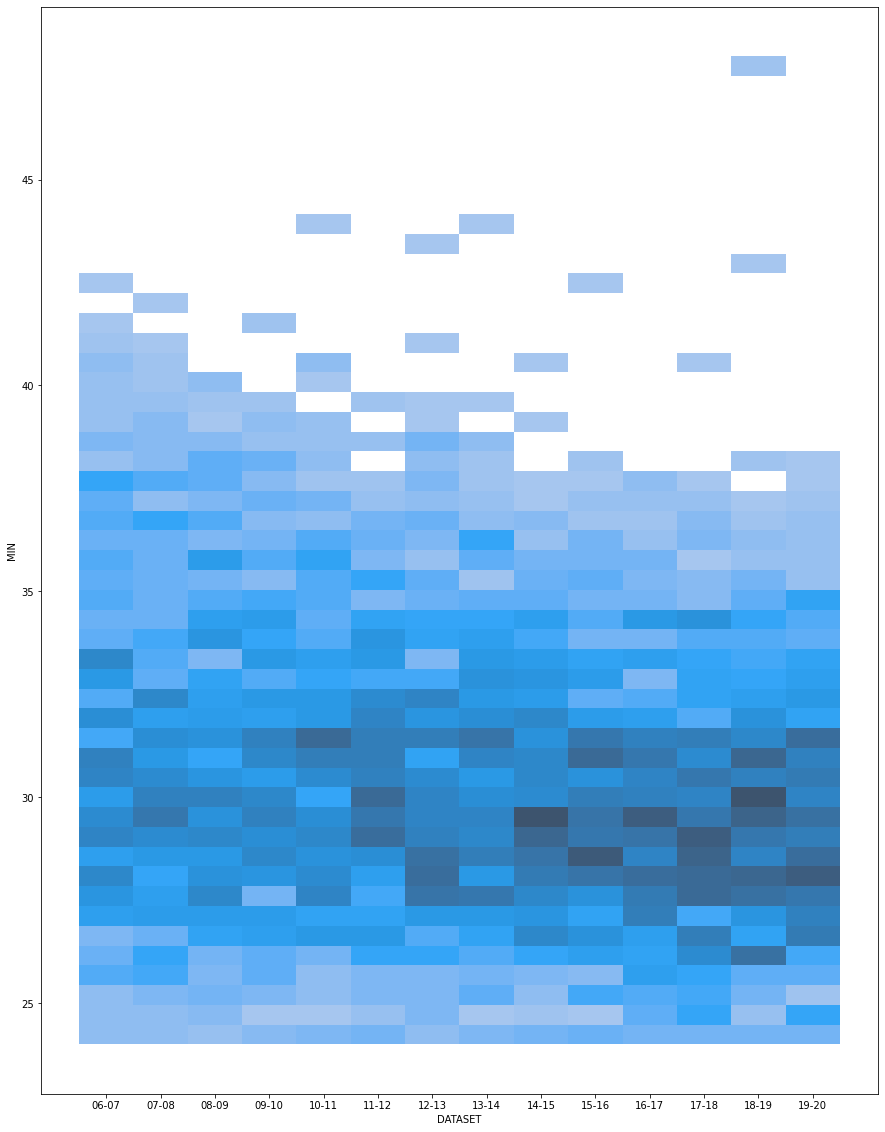

In [5]:
# Density of minutes played by season

plt.figure(figsize=(15, 20))
# for season in unique_seasons:
sns.histplot(
  data = df_hist_minutes, y = 'MIN', x='DATASET', bins= 50
  #df_hist_min.loc[df_hist_min['DATASET'] == season, 'MIN'], label = season, kde=True
)


<AxesSubplot:xlabel='DATASET', ylabel='PER'>

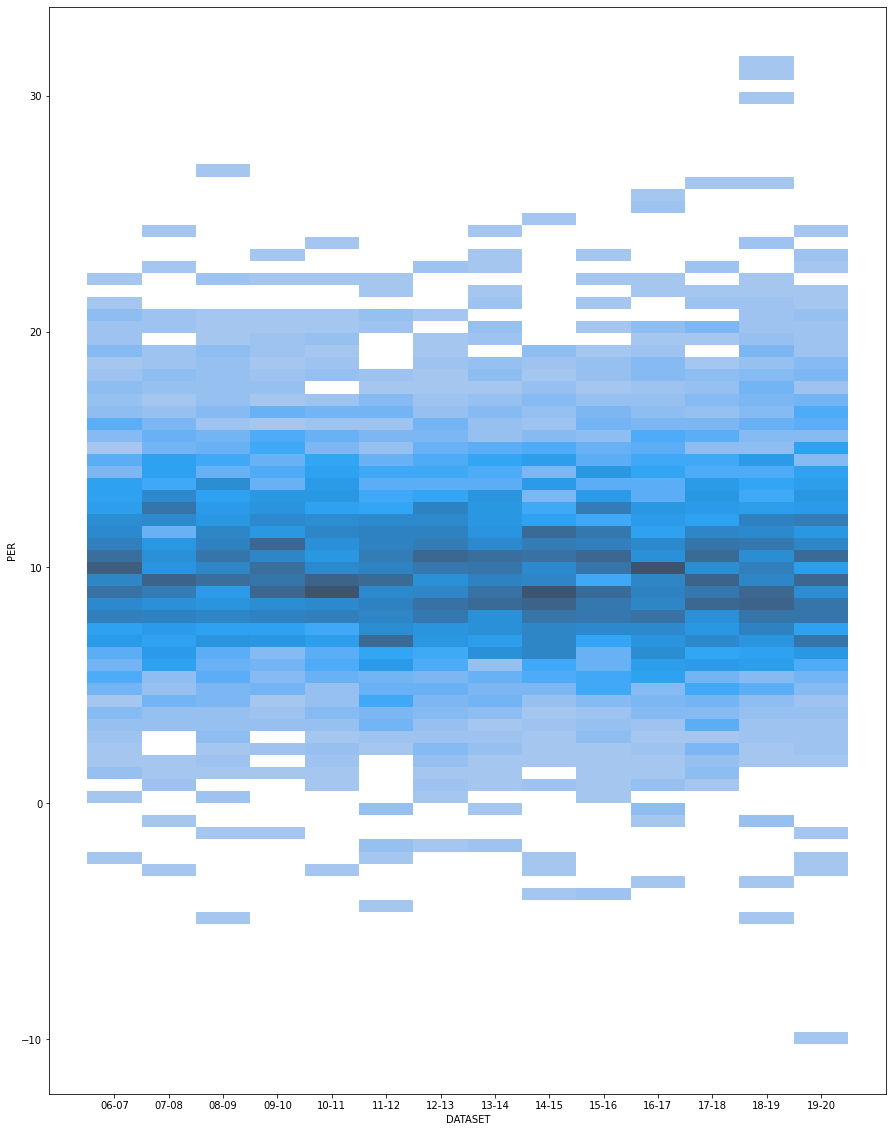

In [173]:
plt.figure(figsize=(15, 20))
sns.histplot(
    data = df_hist_minutes,
    x = 'DATASET',
    y = 'PER',
    legend=False
)

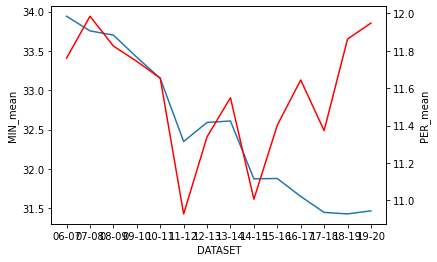

In [121]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.lineplot(data = df_hist_sum, x='DATASET', y='MIN_mean', markers=True, ax = ax1)
# sns.lineplot(data = df_hist_sum, x='DATASET', ax = ax1, y='MIN_median')
# sns.lineplot(data = df_hist_sum, x='DATASET', ax = ax1, y='MIN_var')
#sns.lineplot(data = df_hist_sum, x='DATASET', ax = ax1, y='MIN_std')
sns.lineplot(data = df_hist_sum, x='DATASET', y='PER_mean', markers=True, dashes=True, color='red', ax = ax2)
plt.show()

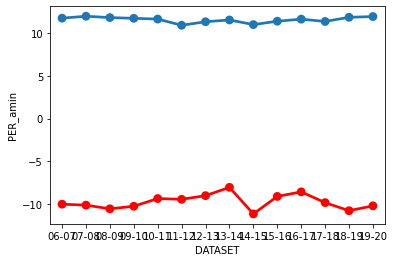

In [133]:
# PER 
fig, ax = plt.subplots()
sns.pointplot(
    data = df_hist_sum, 
    x = 'DATASET',
    y = 'PER_mean'
) 
sns.pointplot(
    data = df_hist_sum, 
    x = 'DATASET',
    y = 'PER_amin',
    color = 'red'
) 

plt.show()

In [16]:
season_rest_df.melt(
      
)
# fig, ax = plt.subplot()

# sns.barplot(
 #   x = D )
#

MultiIndex([( '1.0 days', 'count_nonzero'),
            ( '2.0 days', 'count_nonzero'),
            ( '3.0 days', 'count_nonzero'),
            ( '4.0 days', 'count_nonzero'),
            ( '5.0 days', 'count_nonzero'),
            ( '6.0 days', 'count_nonzero'),
            ( '7.0 days', 'count_nonzero'),
            ( '8.0 days', 'count_nonzero'),
            ( '9.0 days', 'count_nonzero'),
            ('10.0 days', 'count_nonzero'),
            ('11.0 days', 'count_nonzero'),
            ('12.0 days', 'count_nonzero'),
            ('13.0 days', 'count_nonzero'),
            ('14.0 days', 'count_nonzero'),
            ( '14+ days', 'count_nonzero')],
           )

For the independent variables, we have:
    Player Quality – Estimated as being the constant in the regression model
    Home Court Advantage – A binary variable that indicates if the player is at home or on the road
    Opp. Quality – The opponent’s quality will be estimated by 2 variables: its offensive and its defensive efficiency (points allowed/scored per 100 possessions)
    Rest Level – To estimate a player’s rest level, we create variables to reflect the activity for the past 3 days. There are two approaches for these variables:
    Minutes – There are 3 variables (non-dummy) that reflect how many minutes the player was on court for each of the past 3 days
    Days-off – The variables reflect if the player entered a game, no matter how much he played (e.g., the dummy “011”, means that the team has played 2 and 3 days ago, and has not played yesterday)

This results in the following regression model (using the “minutes” approach for rest level):

    PER= α + C * H + ( C * OO + C * OD ) + ( C * M1 + C * M2 + C * M3 ) + err

Where:
    PER = Player Efficiency Rating (for the game)
    α = Constant (that can be interpreted as a player’s baseline performance)
    H = Binary variable that is 1 if the player is playing at home, and 0 if he is playing on the road
    OO = Opponent’s offensive efficiency during the season
    OD = Opponent’s team defensive efficiency during the season
    M1/M2/M3 = Number of minutes the player has played 1, 2, and 3 days before the game
